In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import os

In [2]:
targets = ["Dog_" + str(i+1) for i in xrange(5)] + ["Patient_1", "Patient_2"]
print targets

['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']


In [3]:
logdir = "./log/"
!ls -ltrh $logdir

total 392K
drwxrwxr-x 3 yujin yujin 4.0K May  8 18:44 Dog_4_20170508165253
drwxrwxr-x 3 yujin yujin 4.0K May  8 19:00 Dog_4_20170508190036
-rw-rw-r-- 1 yujin yujin  93K May  8 19:09 log_Dog_4.txt
drwxrwxr-x 3 yujin yujin 4.0K May  9 11:41 Dog_3_20170509114049
drwxrwxr-x 3 yujin yujin 4.0K May  9 11:47 Dog_3_20170509114546
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:08 Dog_3_20170509120643
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:25 Dog_3_20170509122545
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:27 Dog_3_20170509122556
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:44 Dog_3_20170509124254
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:45 Dog_3_20170509124506
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:52 Dog_3_20170509125057
drwxrwxr-x 3 yujin yujin 4.0K May  9 12:56 Dog_3_20170509125447
drwxrwxr-x 3 yujin yujin 4.0K May  9 13:12 Dog_3_20170509130602
-rw-rw-r-- 1 yujin yujin 237K May  9 13:13 log_Dog_3.txt
drwxrwxr-x 3 yujin yujin 4.0K May  9 15:24 Dog_4_20170509152407
drwxrwxr-x 3 yujin yujin 4.0K May  9 15:24 

In [16]:
log_folders = [os.path.join(logdir, f) for f in os.listdir(logdir)]
target_id = 4
target_obj = targets[target_id-1]
tar_dir = [f for f in log_folders if os.path.isdir(f) and target_obj in f]
tar_dir = np.sort(tar_dir)[-1]
print tar_dir
all_files = os.listdir(tar_dir)
print all_files
hist_files = np.sort([f for f in all_files if "hist_" in f])
model_files = np.sort(os.listdir(os.path.join(tar_dir, "model")))
print "history files:", hist_files
print "model files:", model_files

./log/Dog_4_20170509152447
['train_valid_split.pkl', 'train_mean_std_fold1.npz', 'hist_fold0.pkl', 'hist_fold1.pkl', 'train_mean_std_fold0.npz', 'model.png', 'model', 'output_fold0.csv']
history files: ['hist_fold0.pkl' 'hist_fold1.pkl']
model files: ['bestmodel_fold0.h5' 'bestmodel_fold1.h5' 'finalmodel_fold0.h5'
 'finalmodel_fold1.h5']


# Trial Settings

In [17]:
logfile = os.path.join(logdir, "log_{}.txt".format(target_obj))
!head -25 $logfile

Using TensorFlow backend.
I tensorflow/stream_executor/dso_loader.cc:135] successfully opened CUDA library libcublas.so.8.0 locally
I tensorflow/stream_executor/dso_loader.cc:135] successfully opened CUDA library libcudnn.so.5 locally
I tensorflow/stream_executor/dso_loader.cc:135] successfully opened CUDA library libcufft.so.8.0 locally
I tensorflow/stream_executor/dso_loader.cc:135] successfully opened CUDA library libcuda.so.1 locally
I tensorflow/stream_executor/dso_loader.cc:135] successfully opened CUDA library libcurand.so.8.0 locally
2017-05-08 19:00:36,505 [INFO] __main__: reg_coef = 0.0
2017-05-08 19:00:36,505 [INFO] __main__: data_dir = ../data
2017-05-08 19:00:36,505 [INFO] __main__: verbose = 0
2017-05-08 19:00:36,505 [INFO] __main__: downsample = 0
2017-05-08 19:00:36,505 [INFO] __main__: corr_coef_pp = 0.0
2017-05-08 19:00:36,505 [INFO] __main__: train_mean_std_dir = ../train_mean_std_dir
2017-05-08 19:00:36,505 [INFO] __main__: dropout_prob = 0.0
2017-05-08 19:00:36,505

# Network Architecture

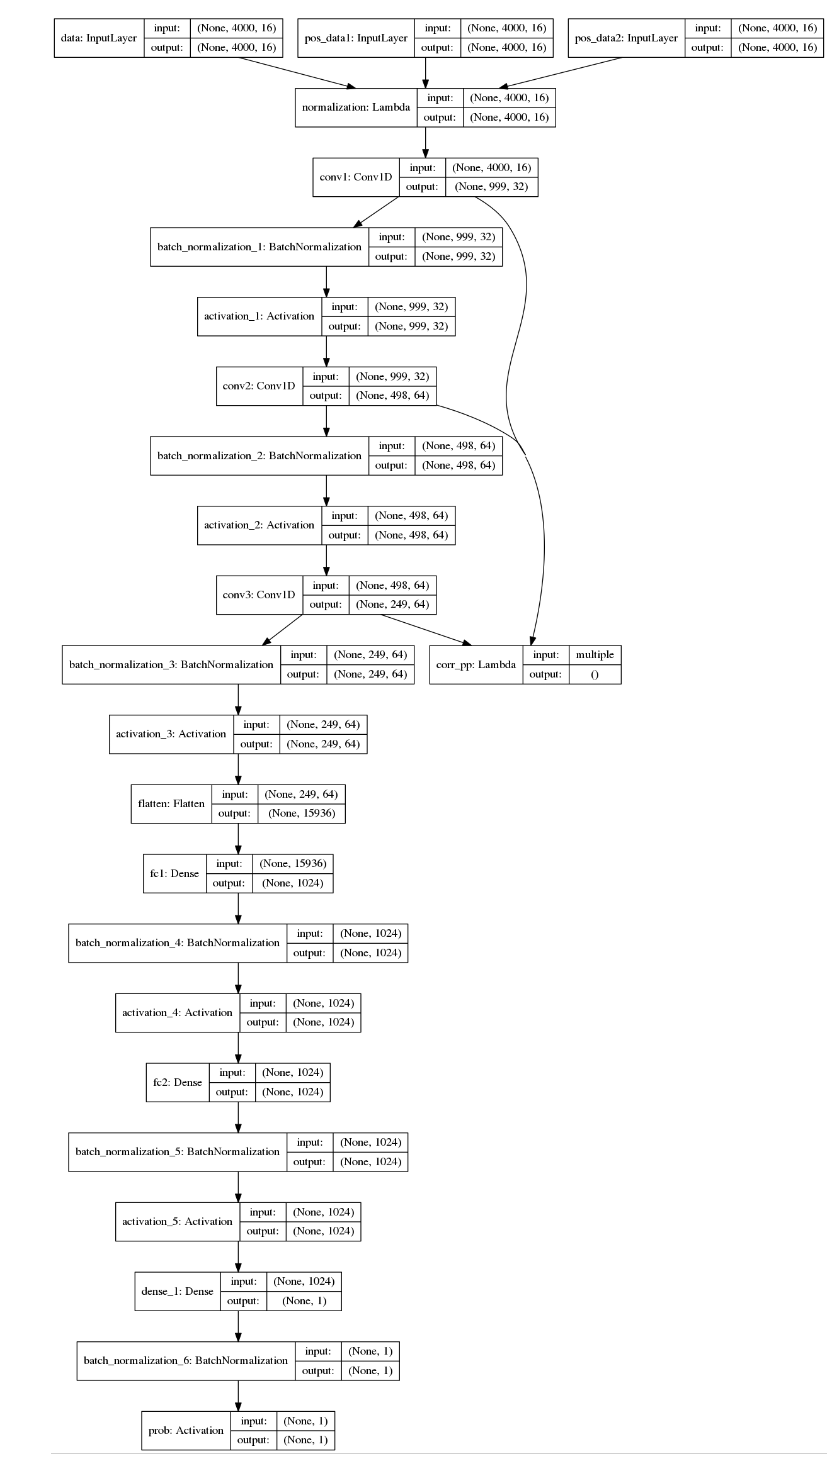

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 20))
model_arch = plt.imread(os.path.join(tar_dir, "model.png"))
ax.imshow(model_arch)
ax.set_axis_off()

# Learning Curves

./log/Dog_4_20170509152447/hist_fold0.pkl
['corr_pp_loss_1' 'corr_pp_loss_2' 'corr_pp_loss_3' 'loss' 'prob_loss']
./log/Dog_4_20170509152447/hist_fold1.pkl
['corr_pp_loss_1' 'corr_pp_loss_2' 'corr_pp_loss_3' 'loss' 'prob_loss']


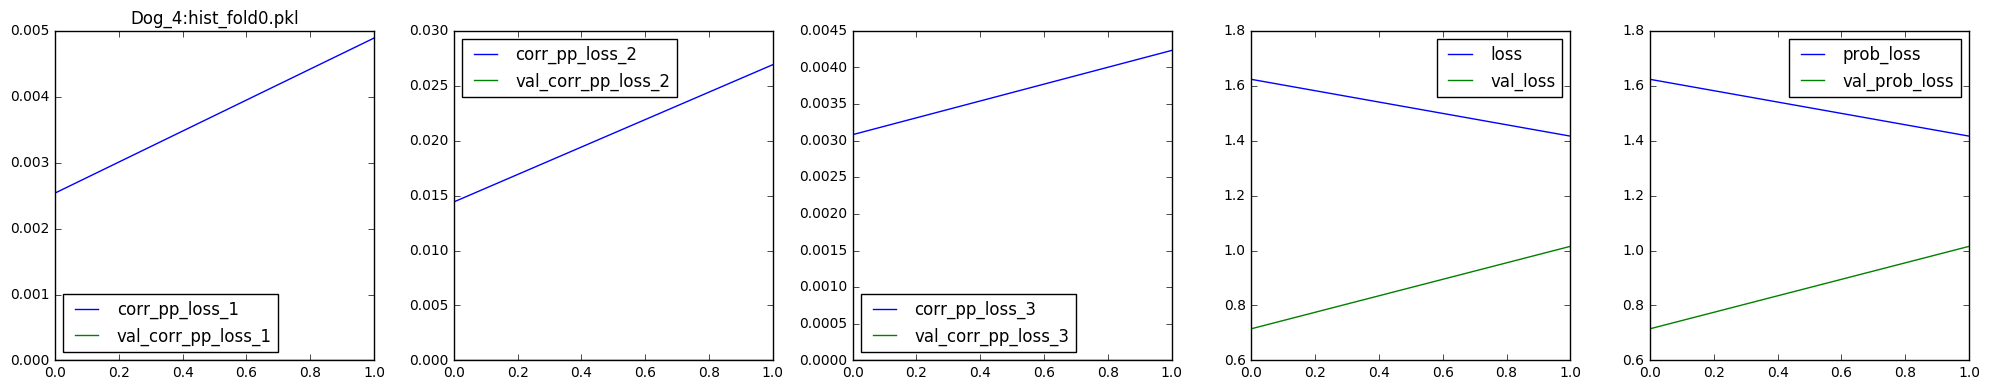

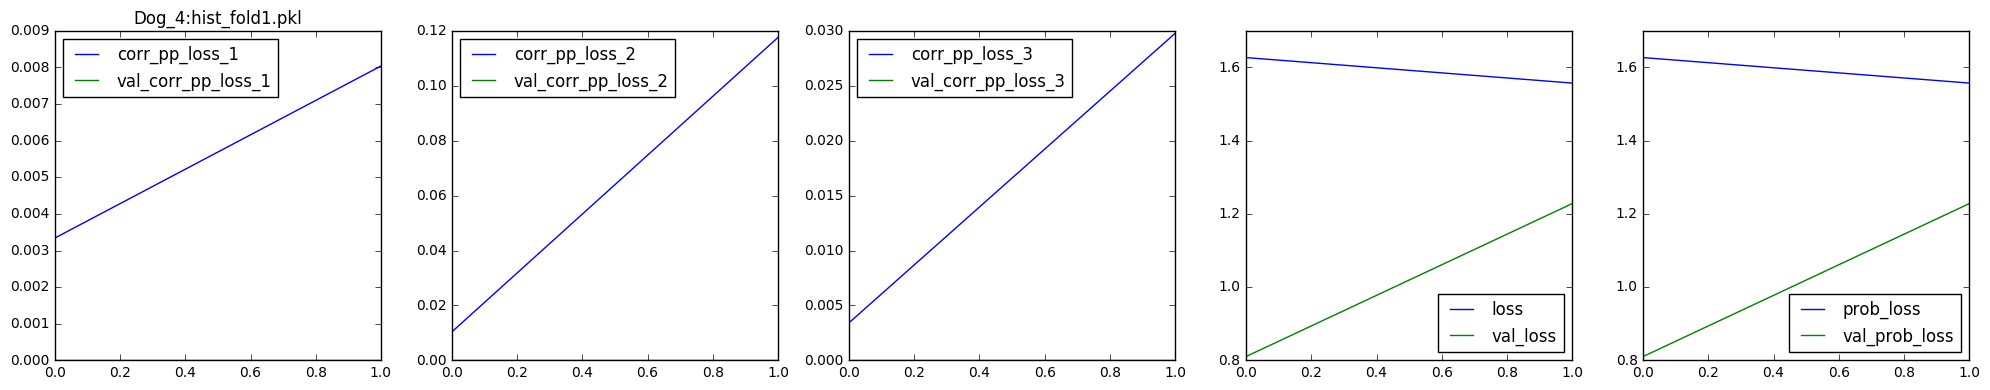

In [19]:
n_folds = len(hist_files)
nrows = n_folds

for row_id in xrange(n_folds):
    hfile = os.path.join(tar_dir, hist_files[row_id])
    print hfile
    with open(hfile, "rb") as f:
        hh = pickle.load(f)
    all_metrics = np.sort([mm for mm in hh.keys() if mm[:4]!="val_"])
    if "weights_squared_sum" in all_metrics:
        all_metrics = all_metrics[:-1]
    print all_metrics
    ncols = all_metrics.size
    fig, axes = plt.subplots(1, ncols, figsize=(4*ncols, 4))
    for col_id, metric in enumerate(all_metrics):
        ax = axes[col_id]
        pd.DataFrame({metric: hh[metric], "val_{}".format(metric): hh["val_{}".format(metric)]}).plot(ax=ax)
        if col_id == 0:
            ax.set_title(target_obj + ":" + os.path.basename(hfile))
    plt.tight_layout()

# Plot Weights

./log/Dog_4_20170509152447/hist_fold0.pkl
./log/Dog_4_20170509152447/hist_fold1.pkl


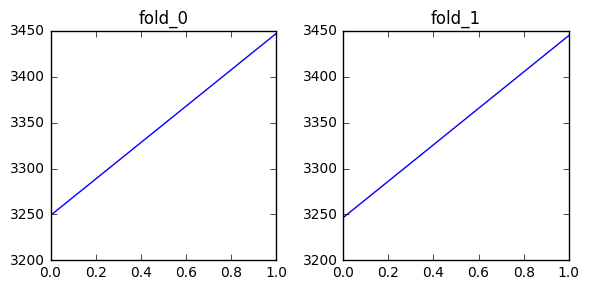

In [24]:
fig, axes = plt.subplots(1, n_folds, figsize=(3*n_folds, 3))

for idx in xrange(n_folds):
    hfile = os.path.join(tar_dir, hist_files[idx])
    print hfile
    with open(hfile, "rb") as f:
        hh = pickle.load(f)
    ax = axes[idx]
    pd.Series(hh["weights_squared_sum"]).plot(ax=ax)
    ax.set_title("fold_{}".format(idx))
plt.tight_layout()